# Retail Sales Performance Analysis

## Objective
To analyze sales and profitability across categories and identify key drivers affecting business performance.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Data/SampleSuperstore.csv")


## Data Overview
- Dataset contains 9,994 records
- 13 columns
- Key metrics: Sales, Profit, Quantity, Discount


In [5]:
df.shape


(9994, 13)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Overall Business Performance


In [8]:
df[['Sales','Profit','Quantity','Discount']].describe()


,Sales,Profit,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574,0.156203
std,623.245101,234.260108,2.225110,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.280000,1.728750,2.000000,0.000000
50%,54.490000,8.666500,3.000000,0.200000
75%,209.940000,29.364000,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


In [9]:
(df['Profit'] < 0).sum()


1871

In [10]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

total_sales, total_profit


(2297200.8603000003, 286397.0217)

In [11]:
profit_margin = (total_profit / total_sales) * 100
profit_margin


12.467217240315604

## Category-wise Sales and Profit


In [13]:
category_analysis = df.groupby('Category')[['Sales','Profit']].sum()
category_analysis


,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


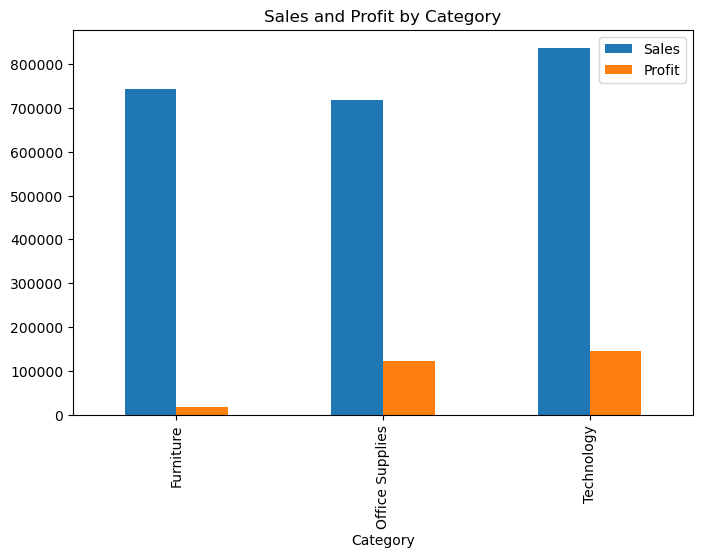

In [14]:
df.groupby('Category')[['Sales','Profit']].sum().plot(kind='bar', figsize=(8,5))
plt.title("Sales and Profit by Category")
plt.show()


In [15]:
df.groupby('Category')['Profit'].sum().sort_values()


Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [16]:
df.groupby('Category')['Discount'].mean()


Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

In [17]:
df[['Discount','Profit']].corr()


,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


In [18]:
df.groupby('Sub-Category')['Profit'].sum().sort_values().head()



Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64

# Insight

Technology generates the highest overall profit, while Furniture shows comparatively lower profitability. 
Although Furniture contributes significant sales, its profit margins are weaker, indicating potential discount or cost-related issues.


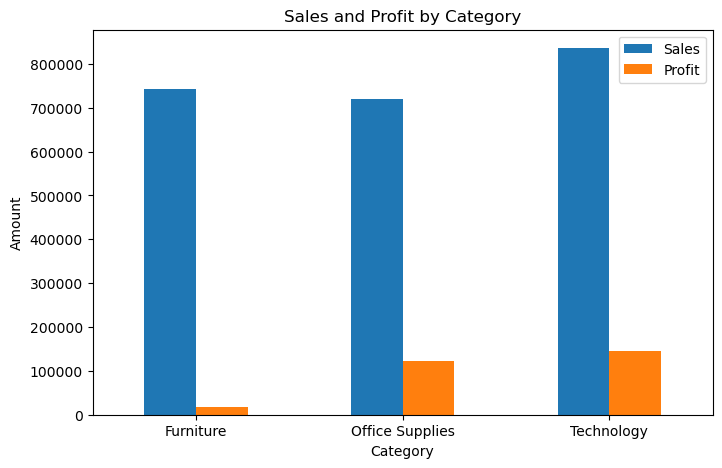

In [20]:
category_data = df.groupby('Category')[['Sales','Profit']].sum()

category_data.plot(kind='bar', figsize=(8,5))
plt.title("Sales and Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


### Insight

The Tables sub-category generates the highest losses among all sub-categories. 
This indicates a major profitability concern within the Furniture category. 
Certain other sub-categories also show weak performance and may require pricing or discount strategy review.


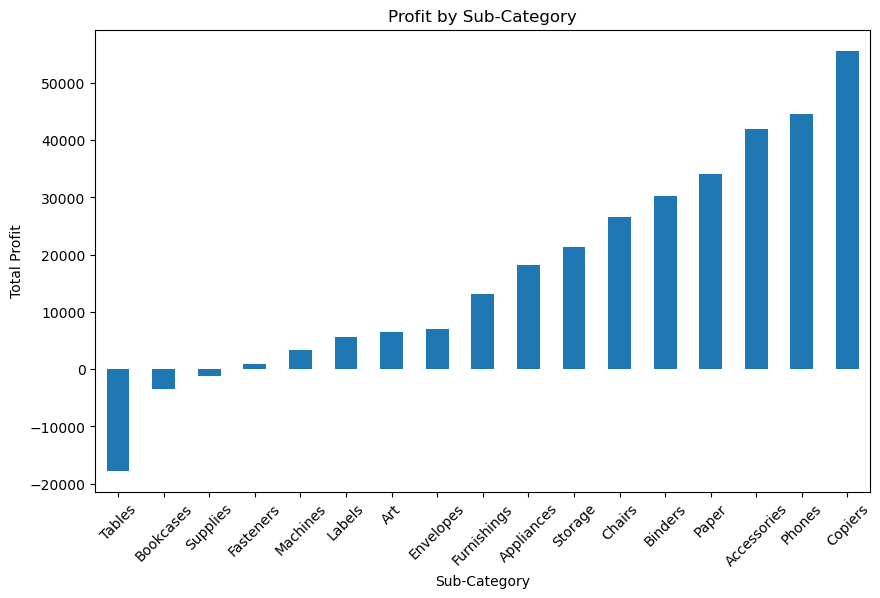

In [22]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

subcat_profit.plot(kind='bar', figsize=(10,6))
plt.title("Profit by Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()


### Insight

The scatter plot indicates a negative relationship between Discount and Profit. 
Higher discount levels are generally associated with lower profit values, suggesting that aggressive discounting reduces overall profitability.


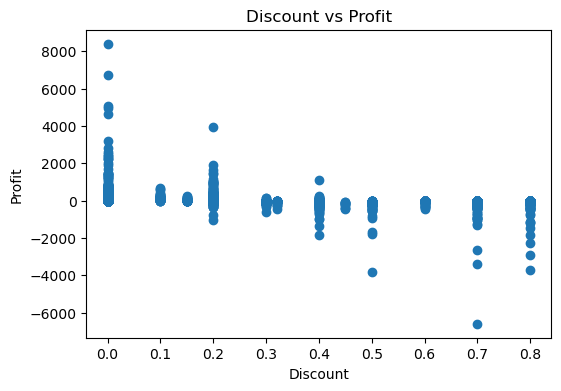

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(df['Discount'], df['Profit'])
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


### Insight

Sales performance varies across regions. 
Some regions contribute significantly higher revenue, indicating stronger market demand. 
Lower-performing regions may require targeted marketing or operational improvements.


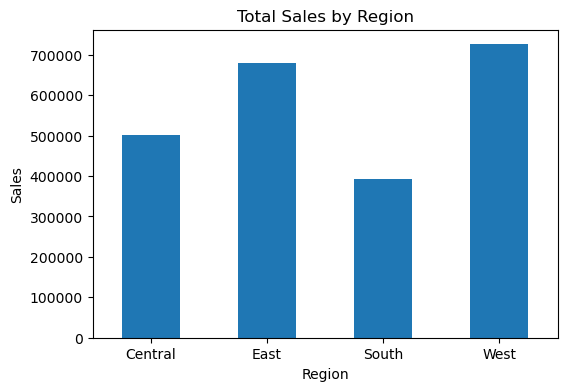

In [26]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales.plot(kind='bar', figsize=(6,4))
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.show()


## Key Insights

1. Overall profit margin is approximately 12.5%.
2. Technology is the most profitable category.
3. Furniture shows weak profitability due to higher discount levels.
4. Tables sub-category contributes the highest losses.
5. Higher discounts negatively impact profit.
